In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Change directory to src to import functions from load.py
%cd "../src"
from load import get_values_sql, compressed2img, object2numeric_array

/home/rajk/DIT/Advance DL for Robotics/tum-adlr-ss21-11/src


## Initialize global variables

In [11]:
data_file = r"../SingleSphere02.db"   # Path of the data in your machine 

n_voxels = 64
voxel_size = 10 / 64     # in m
extent = [0, 10, 0, 10]  # in m
n_waypoints = 22         # start + 20 inner points + end
n_dim = 2
n_paths_per_world = 1000
n_worlds = 5000

## Loading data

In [12]:
worlds = get_values_sql(file=data_file, table='worlds')
obstacle_images = compressed2img(img_cmp=worlds.obst_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)
print(f"Obstacle images dimension: {obstacle_images.shape}")

Obstacle images dimension: (5000, 64, 64)


Each world consists of **1000 paths** i.e. world 0 = 0 - 999, world 1 = 1000 - 1999, etc.

In [13]:
# always 1000 paths belong to one world
# 0...999     -> world 0
# 1000...1999 -> world 1
# 2000...2999 -> world 2
paths = get_values_sql(file=data_file, table='paths', rows=[0, 1, 2, 1000, 2000])
path_images = compressed2img(img_cmp=paths.path_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)
start_images = compressed2img(img_cmp=paths.start_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)
end_images = compressed2img(img_cmp=paths.end_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)

q_paths = object2numeric_array(paths.q_path.values)
q_paths = q_paths.reshape(-1, n_waypoints, n_dim)

## Plot and example

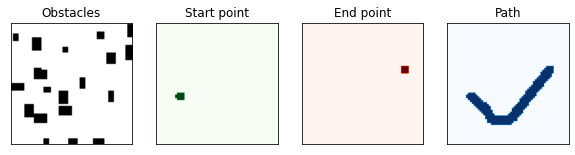

In [23]:
i = 0
i_world = paths.i_world[i].item()

_, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
axs[0].imshow(obstacle_images[i_world].T, origin='lower', extent=extent, cmap='binary')
axs[1].imshow(start_images[i].T, origin='lower', extent=extent, cmap='Greens')
axs[2].imshow(end_images[i].T, origin='lower', extent=extent, cmap='Reds')
axs[3].imshow(path_images[i].T, origin='lower', extent=extent, cmap='Blues')
# Set titles and remove x/y ticks
for (ax, title) in zip(axs, ("Obstacles", "Start point", "End point", "Path")) :
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

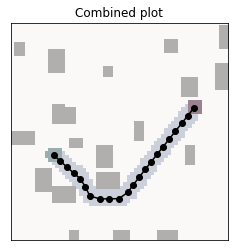

In [21]:
i = 0
i_world = paths.i_world[i].item()

fig, ax = plt.subplots()
ax.imshow(obstacle_images[i_world].T, origin='lower', extent=extent, cmap='binary',)
ax.imshow(start_images[i].T, origin='lower', extent=extent, cmap='Greens', alpha=0.4)
ax.imshow(end_images[i].T, origin='lower', extent=extent, cmap='Reds', alpha=0.4)
ax.imshow(path_images[i].T, origin='lower', extent=extent, cmap='Blues', alpha=0.2)
ax.plot(*q_paths[i].T, color='k', marker='o')
plt.title("Combined plot")
plt.xticks([])
plt.yticks([])
plt.show()